In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
from ggplot import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline
%load_ext rpy2.ipython
sns.set_context(context="talk")

In [2]:
%%R 
library(dplyr)
library(tidyr)
library(ggplot2)
library(fueleconomy)
data(vehicles)
vehicles <- as.data.frame(vehicles)
head(vehicles)

/usr/local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


     id       make               model year                       class
1 27550 AM General   DJ Po Vehicle 2WD 1984 Special Purpose Vehicle 2WD
2 28426 AM General   DJ Po Vehicle 2WD 1984 Special Purpose Vehicle 2WD
3 27549 AM General    FJ8c Post Office 1984 Special Purpose Vehicle 2WD
4 28425 AM General    FJ8c Post Office 1984 Special Purpose Vehicle 2WD
5  1032 AM General Post Office DJ5 2WD 1985 Special Purpose Vehicle 2WD
6  1033 AM General Post Office DJ8 2WD 1985 Special Purpose Vehicle 2WD
            trans            drive cyl displ    fuel hwy cty
1 Automatic 3-spd    2-Wheel Drive   4   2.5 Regular  17  18
2 Automatic 3-spd    2-Wheel Drive   4   2.5 Regular  17  18
3 Automatic 3-spd    2-Wheel Drive   6   4.2 Regular  13  13
4 Automatic 3-spd    2-Wheel Drive   6   4.2 Regular  13  13
5 Automatic 3-spd Rear-Wheel Drive   4   2.5 Regular  17  16
6 Automatic 3-spd Rear-Wheel Drive   6   4.2 Regular  13  13


In [3]:
from rpy2.robjects import pandas2ri
from rpy2.robjects import r, DataFrame

pandas2ri.activate()
vehicles = r["vehicles"]
vehicles.head()

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
1,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4,2.5,Regular,17,18
2,28426,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4,2.5,Regular,17,18
3,27549,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6,4.2,Regular,13,13
4,28425,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6,4.2,Regular,13,13
5,1032,AM General,Post Office DJ5 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,4,2.5,Regular,17,16


In [4]:
%%R
sapply(colnames(vehicles), function (col_name) {
    length(levels(factor(vehicles[,col_name])))
})

   id  make model  year class trans drive   cyl displ  fuel   hwy   cty 
33442   128  3198    32    34    48     7     9    64    13    68    67 


# Data visualization and graphics in Python;

## or, Where is my `ggplot2`?!

#### (for any scientists making the switch from R)

***

Hana Lee  
12 August 2016  
8th Light Small Talk  

# Data communication

"Big Data" is....
* multidimensional
* continuous & discrete
* nonlinear
* noisy
  
  
  
...**complicated**.

# Wise words
  
"Graphical excellence is that which gives to the viewer the greatest number of ideas in the shortest time with the least ink in the smallest space."
  
_Visual Display of Quantitative Information_, by Edward Tufte

# Processing visual information

<img src="pies_vs_bars.png" style="float:right;" />
* quantities 
    * length
    * area
    * scale
* relationships
    * proximity
    * similarity
    * connection or boundary
* attention
* narrative

# A grammar of graphics?
  
* aesthetics
* geometric objects
* scales
* coordinates
* statistics
* facets
* annotations
  
[_Grammar of Graphics_](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448), by Leland Wilkinson

# `ggplot2`

* Clear, consistent syntax based on "grammar of graphics"
* Layer system for adding new elements to a plot
* Facet system for subsetting data into series of related plots

In [5]:
%%R

vehicles_mpg <- vehicles %>% gather(mpgtype, mpg, hwy:cty)
head(vehicles_mpg)

     id       make               model year                       class
1 27550 AM General   DJ Po Vehicle 2WD 1984 Special Purpose Vehicle 2WD
2 28426 AM General   DJ Po Vehicle 2WD 1984 Special Purpose Vehicle 2WD
3 27549 AM General    FJ8c Post Office 1984 Special Purpose Vehicle 2WD
4 28425 AM General    FJ8c Post Office 1984 Special Purpose Vehicle 2WD
5  1032 AM General Post Office DJ5 2WD 1985 Special Purpose Vehicle 2WD
6  1033 AM General Post Office DJ8 2WD 1985 Special Purpose Vehicle 2WD
            trans            drive cyl displ    fuel mpgtype mpg
1 Automatic 3-spd    2-Wheel Drive   4   2.5 Regular     hwy  17
2 Automatic 3-spd    2-Wheel Drive   4   2.5 Regular     hwy  17
3 Automatic 3-spd    2-Wheel Drive   6   4.2 Regular     hwy  13
4 Automatic 3-spd    2-Wheel Drive   6   4.2 Regular     hwy  13
5 Automatic 3-spd Rear-Wheel Drive   4   2.5 Regular     hwy  17
6 Automatic 3-spd Rear-Wheel Drive   6   4.2 Regular     hwy  13


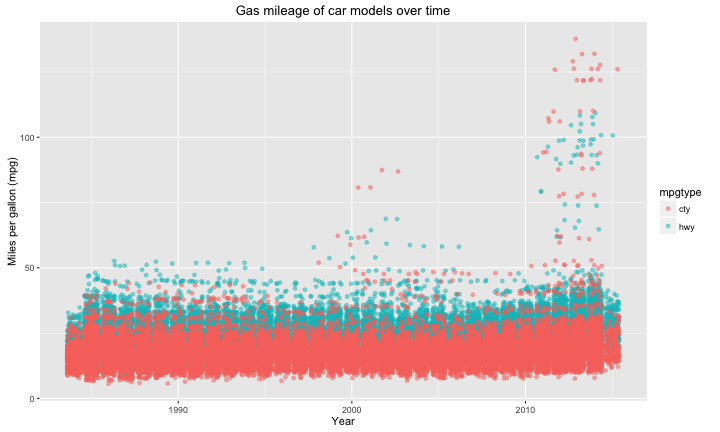

In [6]:
%%R -w 10 -h 6 -u in
mpg_plt <- ggplot(data = vehicles_mpg, aes(y = mpg, x = year, color = mpgtype)) +
           geom_jitter(alpha=0.5, width=1) + 
           xlab("Year") + ylab("Miles per gallon (mpg)") +
           scale_fill_discrete(labels = c("city", "highway"), 
                               name = "Mileage type") +
           ggtitle("Gas mileage of car models over time")
mpg_plt

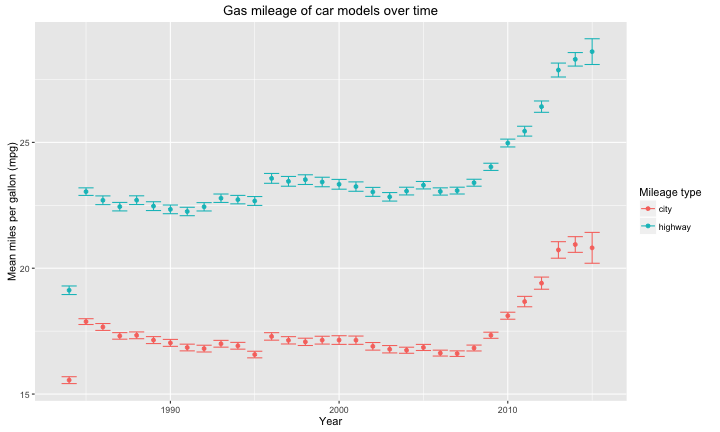

In [7]:
%%R -w 10 -h 6 -u in
mpg_plt <- ggplot(data = vehicles_mpg, aes(y = mpg, x = year, color = mpgtype)) + 
           geom_point(stat = "summary", fun.y = "mean") + 
           stat_summary(fun.data = "mean_se", geom = "errorbar") + 
           xlab("Year") + ylab("Mean miles per gallon (mpg)") +
           scale_color_discrete(labels = c("city", "highway"), 
                                name = "Mileage type") +
           ggtitle("Gas mileage of car models over time")
mpg_plt

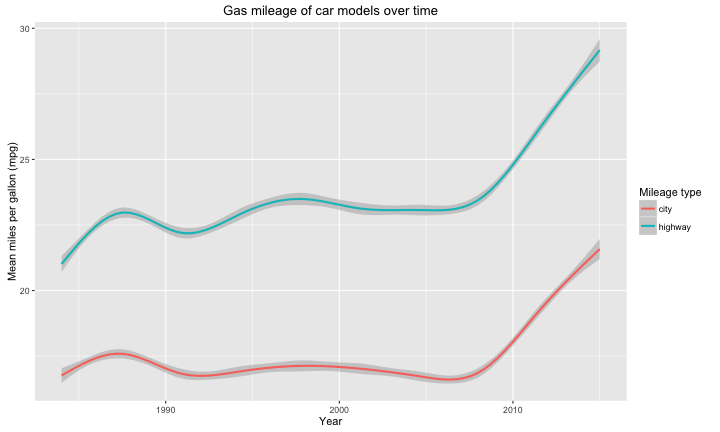

In [8]:
%%R -w 10 -h 6 -u in
mpg_plt <- ggplot(data = vehicles_mpg, aes(y = mpg, x = year, color = mpgtype)) + 
           geom_smooth() + xlab("Year") + ylab("Mean miles per gallon (mpg)") +
           scale_color_discrete(labels = c("city", "highway"), 
                                name = "Mileage type") +
           ggtitle("Gas mileage of car models over time")
mpg_plt

In [9]:
%%R

vehicles_displ <- filter(vehicles_mpg, !is.na(displ))
vehicles_displ <- filter(vehicles_displ, displ != 0)
vehicles_displ <- mutate(vehicles_displ, displ_bin = floor(displ))
head(vehicles_displ)

     id       make               model year                       class
1 27550 AM General   DJ Po Vehicle 2WD 1984 Special Purpose Vehicle 2WD
2 28426 AM General   DJ Po Vehicle 2WD 1984 Special Purpose Vehicle 2WD
3 27549 AM General    FJ8c Post Office 1984 Special Purpose Vehicle 2WD
4 28425 AM General    FJ8c Post Office 1984 Special Purpose Vehicle 2WD
5  1032 AM General Post Office DJ5 2WD 1985 Special Purpose Vehicle 2WD
6  1033 AM General Post Office DJ8 2WD 1985 Special Purpose Vehicle 2WD
            trans            drive cyl displ    fuel mpgtype mpg displ_bin
1 Automatic 3-spd    2-Wheel Drive   4   2.5 Regular     hwy  17         2
2 Automatic 3-spd    2-Wheel Drive   4   2.5 Regular     hwy  17         2
3 Automatic 3-spd    2-Wheel Drive   6   4.2 Regular     hwy  13         4
4 Automatic 3-spd    2-Wheel Drive   6   4.2 Regular     hwy  13         4
5 Automatic 3-spd Rear-Wheel Drive   4   2.5 Regular     hwy  17         2
6 Automatic 3-spd Rear-Wheel Drive   6   4.2 R

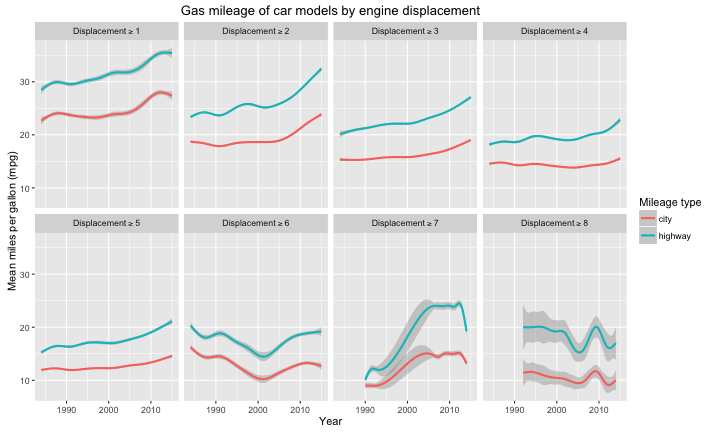

In [23]:
%%R -w 10 -h 6 -u in
displ_plt <- ggplot(aes(y = mpg, x = year, color = mpgtype),  
                    data = vehicles_displ) + geom_smooth() +
                    facet_wrap(~ displ_bin, nrow = 2, 
                               labeller = label_bquote("Displacement" 
                                                       >= .(displ_bin))) +
                    xlab("Year") + ylab("Mean miles per gallon (mpg)") +
                    scale_color_discrete(labels = c("city", "highway"), 
                                         name = "Mileage type") +
                    ggtitle("Gas mileage of car models by engine displacement")
displ_plt

# Switching to Python

* Readable code
* Faster and more powerful
* General-purpose language
* More widely used in industry
* Testing framework
* Easier to deploy and release

# Data visualization packages in Python

* `matplotlib`
* `seaborn`
* `ggplot`

# `matplotlib`

Python port of Matlab plotting library

Pros                                  |Cons  
--------------------------------------|--------------------------------------
Based on widely used Matlab library   |Hard-to-parse syntax  
Functionality for interactive plots   |Ugly default style
Specialized plot types, including 3D  |Difficult to customize style
                                      |Manual subsetting of data for plotting

In [11]:
vehicles_mpg = r["vehicles_mpg"]
vehicles_mpg.head()

,id,make,model,year,class,trans,drive,cyl,displ,fuel,mpgtype,mpg
1,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4,2.5,Regular,hwy,17
2,28426,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4,2.5,Regular,hwy,17
3,27549,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6,4.2,Regular,hwy,13
4,28425,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6,4.2,Regular,hwy,13
5,1032,AM General,Post Office DJ5 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,4,2.5,Regular,hwy,17


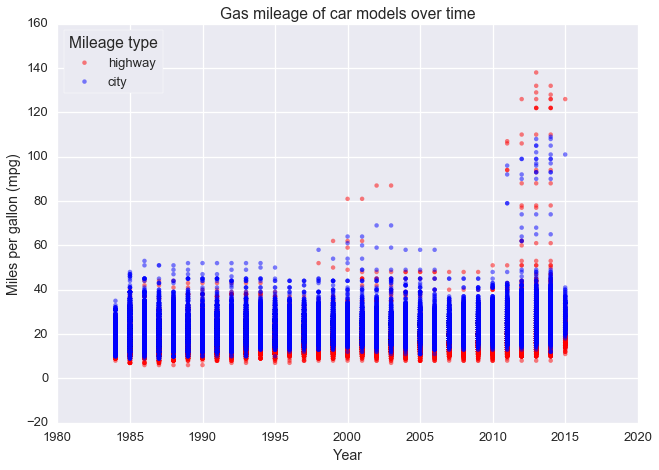

In [12]:
fig, mpg_plt = plt.subplots()
colors = {"hwy": "blue", "cty": "red"}
for mpgtype, color in colors.items():
    type_filter = vehicles_mpg["mpgtype"] == mpgtype
    mpg_plt.scatter(x = vehicles_mpg[type_filter]["year"], 
                    y = vehicles_mpg[type_filter]["mpg"], 
                    c = color, alpha = 0.5, edgecolor = "none")
mpg_plt.legend(["highway", "city"], title = "Mileage type", 
               loc = 2, frameon = True)
mpg_plt.set_title("Gas mileage of car models over time")
mpg_plt.set_xlabel("Year")
mpg_plt.set_ylabel("Miles per gallon (mpg)")

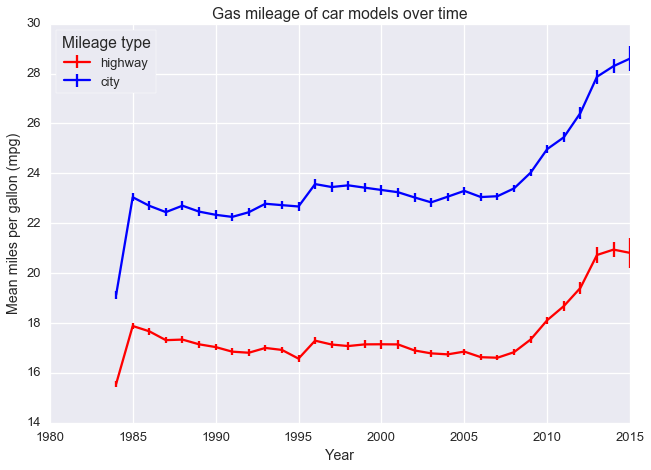

In [13]:
fig, mpg_plt = plt.subplots()
for mpgtype, color in colors.items():
    type_filter = vehicles_mpg["mpgtype"] == mpgtype
    mpg_means = vehicles_mpg[type_filter].groupby(["year"])["mpg"].mean()
    mpg_sem = vehicles_mpg[type_filter].groupby(["year"])["mpg"].sem()
    mpg_plt.errorbar(x = mpg_means.index, y = mpg_means.values, 
                     yerr = mpg_sem.values, c = color)
mpg_plt.legend(["highway", "city"], title = "Mileage type", 
            scatterpoints = 1, loc = 2, frameon = True)
mpg_plt.set_title("Gas mileage of car models over time")
mpg_plt.set_xlabel("Year")
mpg_plt.set_ylabel("Mean miles per gallon (mpg)")

In [14]:
vehicles_displ = r["vehicles_displ"]
vehicles_displ.head()

,id,make,model,year,class,trans,drive,cyl,displ,fuel,mpgtype,mpg,displ_bin
1,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4,2.5,Regular,hwy,17,2.0
2,28426,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4,2.5,Regular,hwy,17,2.0
3,27549,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6,4.2,Regular,hwy,13,4.0
4,28425,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6,4.2,Regular,hwy,13,4.0
5,1032,AM General,Post Office DJ5 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,4,2.5,Regular,hwy,17,2.0


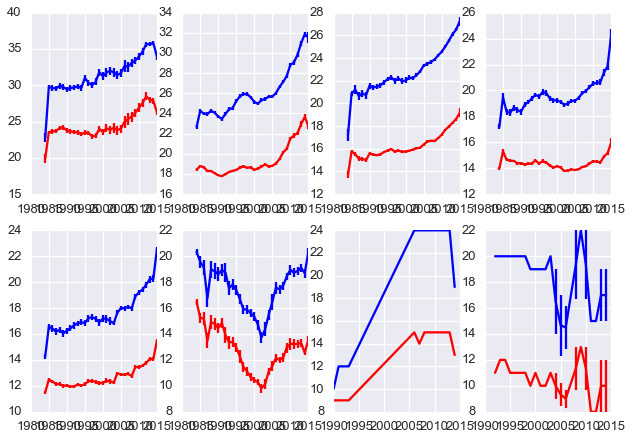

In [15]:
fig, mpg_displ = plt.subplots(4, 2, sharex='col', sharey='row')
for n in range(8):
    plt.subplot(2, 4, n + 1)
    for mpgtype, color in colors.items():
        vehicles_filter = vehicles_displ.query("displ_bin == %i & mpgtype == '%s'"
                                               % (n + 1, mpgtype))
        mpg_means = vehicles_filter.groupby(["year"])["mpg"].mean()
        mpg_sem = vehicles_filter.groupby(["year"])["mpg"].sem()
        plt.errorbar(x = mpg_means.index, y = mpg_means.values, 
                     yerr = mpg_sem.values, c = color)

# `seaborn`

Wrapper for `matplotlib`

Pros                                  |Cons  
--------------------------------------|--------------------------------------
Attractive default style              |Difficult to customize and label
Simplified syntax                     |Limited range of plot types
Easy subsetting of data               |Incomplete documentation

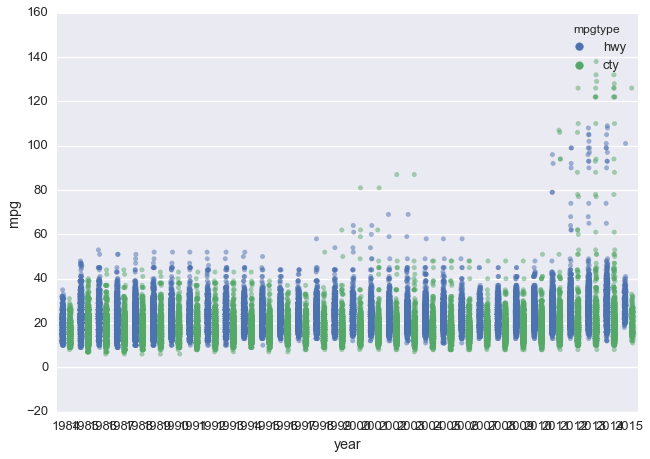

In [16]:
mpg_plt = sns.stripplot(x = "year", y = "mpg", hue="mpgtype", data=vehicles_mpg,
                        jitter = 1.0, alpha = 0.5, split = True)

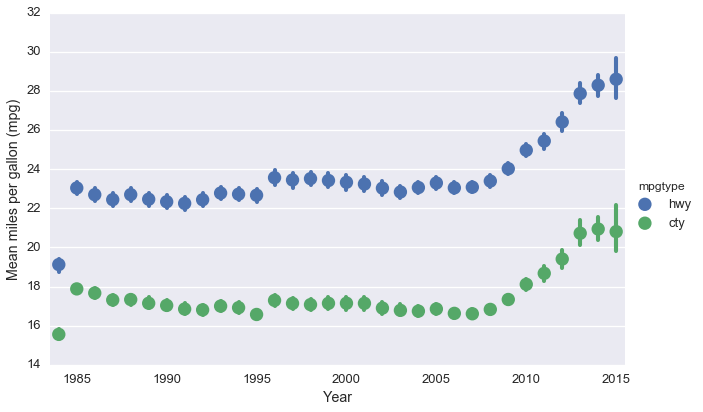

In [17]:
mpg_plt = sns.factorplot(x = "year", y = "mpg", hue="mpgtype", data=vehicles_mpg,
                         join = False, aspect = 1.5, size = 6)
mpg_plt.set_axis_labels("Year", "Mean miles per gallon (mpg)")
mpg_plt.set_xticklabels(map(lambda x: str(x) if x % 5 == 0 else "", 
                            sorted(vehicles_mpg["year"].unique())))

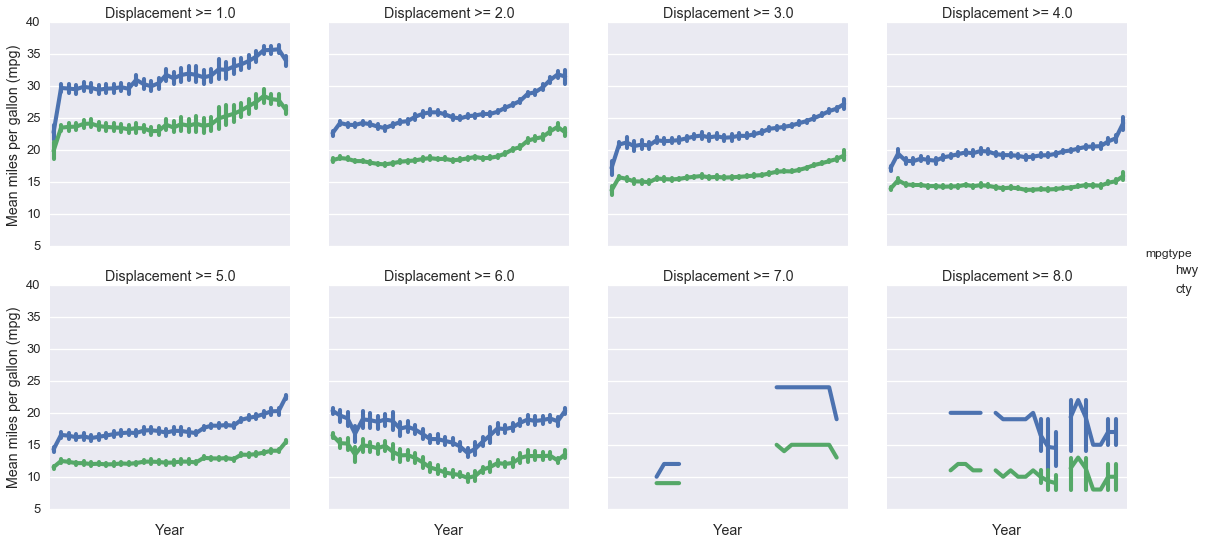

In [18]:
mpg_plt = sns.factorplot(x = "year", y = "mpg", hue = "mpgtype", 
                         data=vehicles_displ, markers = [None, None],
                         col = "displ_bin", col_wrap = 4)
mpg_plt.set_axis_labels("Year", "Mean miles per gallon (mpg)")
mpg_plt.set_xticklabels(map(lambda x: str(x) if x % 5 == 0 else "", 
                            sorted(vehicles_displ["year"].unique())))
mpg_plt.set_titles("Displacement >= {col_name}")

# `ggplot`
  
Python port of `ggplot2` by [&Ycirc;hat](https://www.yhat.com/)

Pros                                  |Cons  
--------------------------------------|--------------------------------------
Implements layering and faceting      |Missing several statistical transformations
Faithful to `ggplot2` syntax          |Missing several plot types
                                      |Incomplete documentation

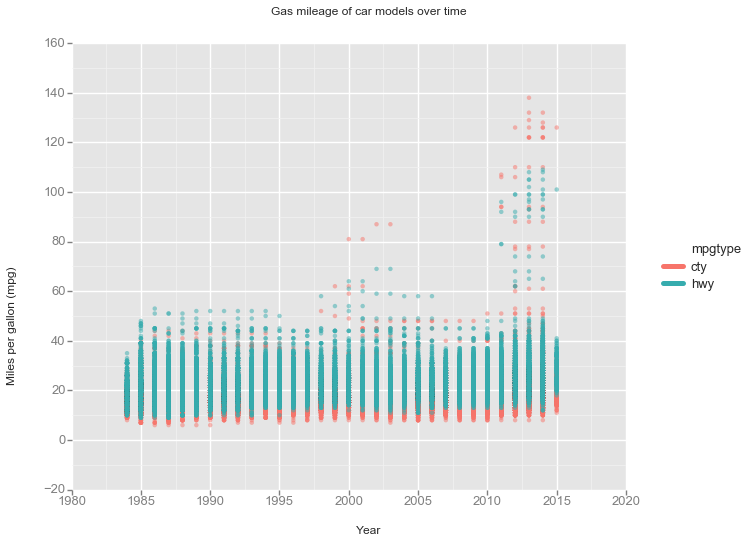

<ggplot: (306494570)>

In [25]:
mpg_plt = ggplot(aes(y = "mpg", x = "year", color = "mpgtype"), 
                 data = vehicles_mpg) + geom_jitter(alpha = 0.5) + \
          xlab("Year") + ylab("Miles per gallon (mpg)") + \
          ggtitle("Gas mileage of car models over time")
mpg_plt

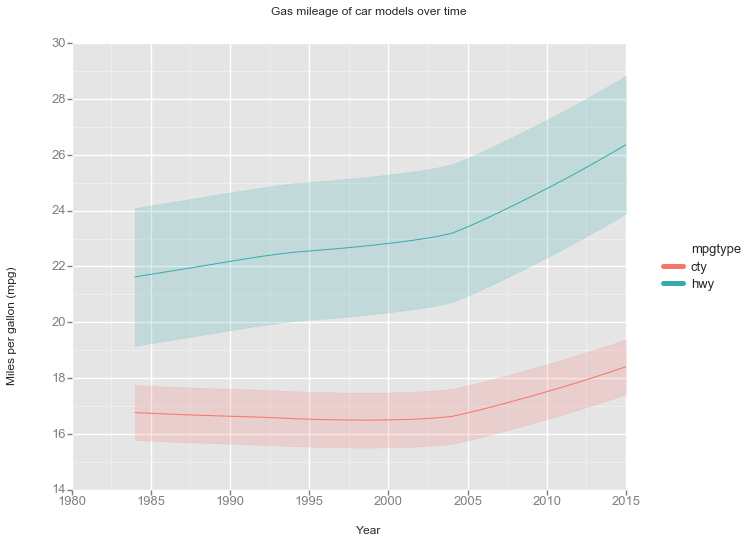

<ggplot: (289478576)>

In [20]:
mpg_plt = ggplot(aes(y = "mpg", x = "year", color = "mpgtype"), 
                 data = vehicles_mpg) + stat_smooth(method = "loess") + \
          xlab("Year") + ylab("Miles per gallon (mpg)") + \
          ggtitle("Gas mileage of car models over time")
mpg_plt

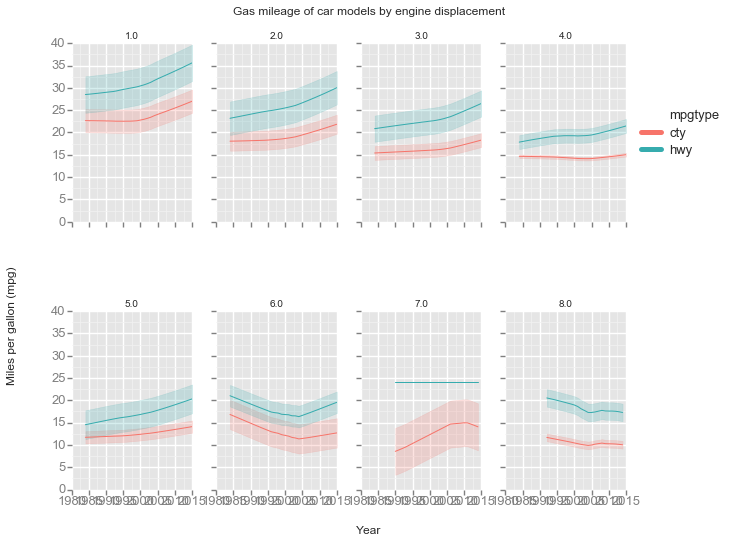

<ggplot: (300849405)>

In [26]:
displ_plt = ggplot(aes(y = "mpg", x = "year", color = "mpgtype"), 
                       data = vehicles_displ) + stat_smooth(method = "loess") + \
            facet_wrap("displ_bin", nrow = 2) + \
            xlab("Year") + ylab("Miles per gallon (mpg)") + \
            ggtitle("Gas mileage of car models by engine displacement")
displ_plt

# ...vs `ggplot2` in R

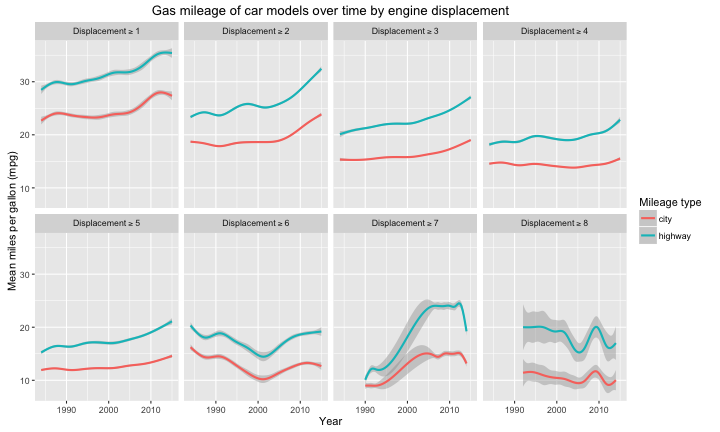

In [22]:
%%R -w 10 -h 6 -u in
displ_plt

# Next steps?

* Contribute:
    * `matplotlib`: <https://github.com/matplotlib/matplotlib>
    * `seaborn`: <https://github.com/mwaskom/seaborn>
    * `ggplot`: <https://github.com/yhat/ggplot>
* Use R and Python together in Jupyter notebooks
* For interactive visualizations, see `ggvis` (R) and `bokeh` (Python)

## Endnotes

**Notebook:** <https://github.com/hnlee/talks/blob/master/pyviz/pyviz.ipynb>

**Slides:** <http://hnlee.github.io/>

[hanalee.info](http://hanalee.info) or [@lee_hn](http://twitter.com/lee_hn)